<a href="https://colab.research.google.com/github/notzabir/fintech-projects/blob/main/REIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Real Estate Price Regression Model**

**Project Background**

Acting as a consultant for a Real Estate Investment Trust (REIT), we are trying to build a model to predict the prices for houses and apartments in New York state so we could get a fair transaction price of a property before it’s sold.

**Problem Specification and Scope**



**Deliverable:** Trained model file

**Machine learning task:** Regression

**Target variable:** Transaction Price

**Win condition:** Avg. prediction error < $70,000 , using Mean Absolute Error (MAE)

**Timeline:** 1 months


**Stages**

Stage 1: Exploratory Data Analysis (EDA)

Stage 2: Data Cleaning

Stage 3: Feature Engineering

Stage 4: Modeling and Evaluation

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [31]:
df = pd.read_csv("real_estate_data.csv")
print ("Shape of dataframe: ",df.shape)

Shape of dataframe:  (1883, 26)


In [32]:
df = df.reset_index() #as there will be
df.head(5)

,index,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


**Features/Columns Explanation:**

**Target variable:**

'tx_price' - Transaction price in USD

**Property Public records:**

'tx_year' - Year the transaction took place

'property_tax' - Monthly property tax

'insurance' - Cost of monthly home owner's insurance

**Property characteristics:**

'beds' - Number of bedrooms

'baths' - Number of bathrooms

'sqft' - Total floor area in squared feet

'lot_size' - Total outside area in squared feet

'year_built' - Year property was built

'basement' - Does the property have a basement?

**Location convenience scores**

'restaurants' - Number of restaurants within 1 mile

'groceries' - Number of grocery stores within 1 mile

'nightlife' - Number of nightlife venues within 1 mile

'cafes' - Number of cafes within 1 mile

'shopping' - Number of stores within 1 mile

'arts_entertainment' - Number of arts and entertainment venues within 1 mile

'beauty_spas' - Number of beauty and spa locations within 1 mile

'active_life' - Number of gyms, yoga studios, and sports venues within 1 mile

**Neighborhood demographics**

'median_age' - Median age of the neighborhood

'married' - Percent of neighborhood who are married

'college_grad' - Percent of neighborhood who graduated college

**Schools**

'num_schools' - Number of public schools within district

'median_school' - Median score of the public schools within district, on the range 1 - 10

1.EDA

In [33]:
df.isnull().any()

,0
index,False
tx_price,False
beds,False
baths,False
sqft,False
year_built,False
lot_size,False
property_type,False
exterior_walls,True
roof,True


There are NAN values in columns 'exterior walls', 'roof' and 'basement'.

The correlation matrix shows the correlation between each features. From the 'tx_price' column, we can see that less then 6 features have a correlation higher than 0.4 with the transaction price.

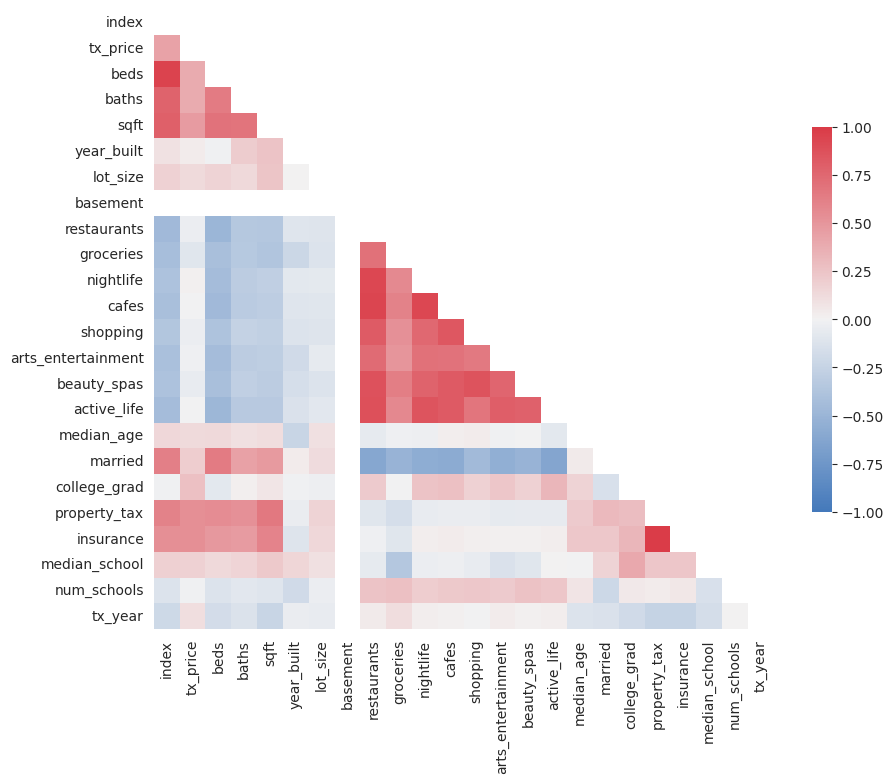

In [34]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Proceed with the rest of your code for heatmap visualization
cmap = sns.diverging_palette(250, 10, as_cmap=True)
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    cmap=cmap,
    mask=mask,
    square=True,
    cbar_kws={"shrink": 0.5},
    vmin=-1.0,
    vmax=1.0,
)
sns.set_style(style="white")

In [35]:
df.groupby(by='tx_year').mean(numeric_only=True)

,index,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,...,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools
tx_year,,,,,,,,,,,,,,,,,,,,,
1993,1433.000000,354489.909091,4.272727,2.818182,3448.000000,1976.181818,21614.272727,1.0,22.545455,4.454545,...,1.818182,15.636364,9.909091,43.818182,85.000000,74.818182,754.000000,233.454545,7.727273,2.818182
1994,1322.222222,365588.777778,4.111111,2.888889,3765.500000,1972.444444,40239.500000,1.0,40.166667,2.500000,...,5.000000,26.500000,15.444444,43.111111,79.555556,72.055556,757.277778,234.166667,7.500000,2.611111
1995,1228.722222,331826.333333,3.888889,3.111111,3237.888889,1981.277778,17643.555556,1.0,46.666667,3.833333,...,5.000000,36.000000,21.166667,42.333333,72.833333,74.888889,758.333333,238.277778,7.250000,2.944444
1996,1430.937500,350669.937500,4.312500,3.062500,3552.375000,1980.625000,26127.875000,1.0,28.531250,2.875000,...,2.281250,17.250000,11.781250,43.437500,80.125000,76.406250,690.093750,211.187500,7.625000,2.875000
1997,1341.925926,293218.518519,4.111111,2.962963,3201.259259,1983.925926,21620.703704,1.0,33.407407,3.074074,...,2.074074,24.740741,12.444444,39.629630,84.407407,72.481481,608.851852,183.222222,7.592593,2.925926
1998,1420.285714,358826.607143,4.321429,3.000000,3470.250000,1979.357143,24360.857143,1.0,20.464286,2.285714,...,1.750000,14.357143,10.428571,41.107143,78.857143,71.714286,702.107143,212.964286,7.232143,2.821429
1999,1344.325000,340737.200000,4.150000,3.150000,3378.500000,1985.825000,17928.475000,1.0,24.300000,2.800000,...,1.600000,16.225000,11.075000,40.750000,77.650000,70.275000,615.900000,183.775000,7.750000,2.850000
2000,1230.214286,342678.071429,3.976190,2.785714,3016.571429,1989.309524,17737.095238,1.0,45.404762,3.214286,...,4.357143,31.238095,17.095238,40.452381,74.095238,68.428571,623.071429,187.095238,6.571429,2.785714
2001,1099.177778,362879.222222,3.644444,2.911111,2697.288889,1982.466667,13280.400000,1.0,35.555556,4.022222,...,3.288889,22.155556,13.600000,39.555556,71.755556,66.200000,542.244444,164.400000,6.577778,2.911111


**2. Feature Engineering**

In [36]:
# add in house age
df["House Age"] = df.tx_year - df.year_built
# add in price/sqft
df["PriceSqft"] = df.tx_price / df.sqft
# add monthly fixed expenses
df["Expenses"] = df.property_tax + df.insurance

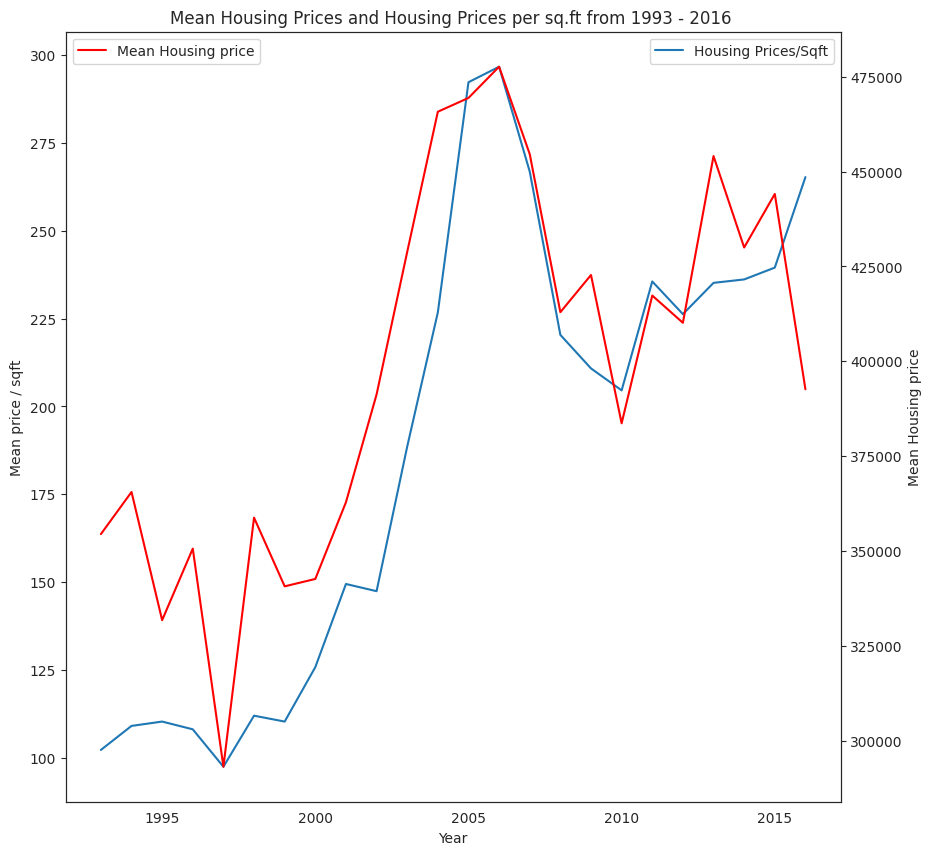

In [37]:
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.plot(df.PriceSqft.groupby(by=df.tx_year).mean().index,df.PriceSqft.groupby(by=df.tx_year).mean().values)
ax2.plot(df.tx_price.groupby(by=df.tx_year).mean().index,df.tx_price.groupby(by=df.tx_year).mean().values,'r')
ax.set_xlabel('Year')
ax.set_ylabel("Mean price / sqft")
ax.set_title("Mean Housing Prices and Housing Prices per sq.ft from 1993 - 2016 ")
ax2.set_ylabel("Mean Housing price")
ax.legend(['Housing Prices/Sqft'],loc=1)
ax2.legend(['Mean Housing price'],loc=2)

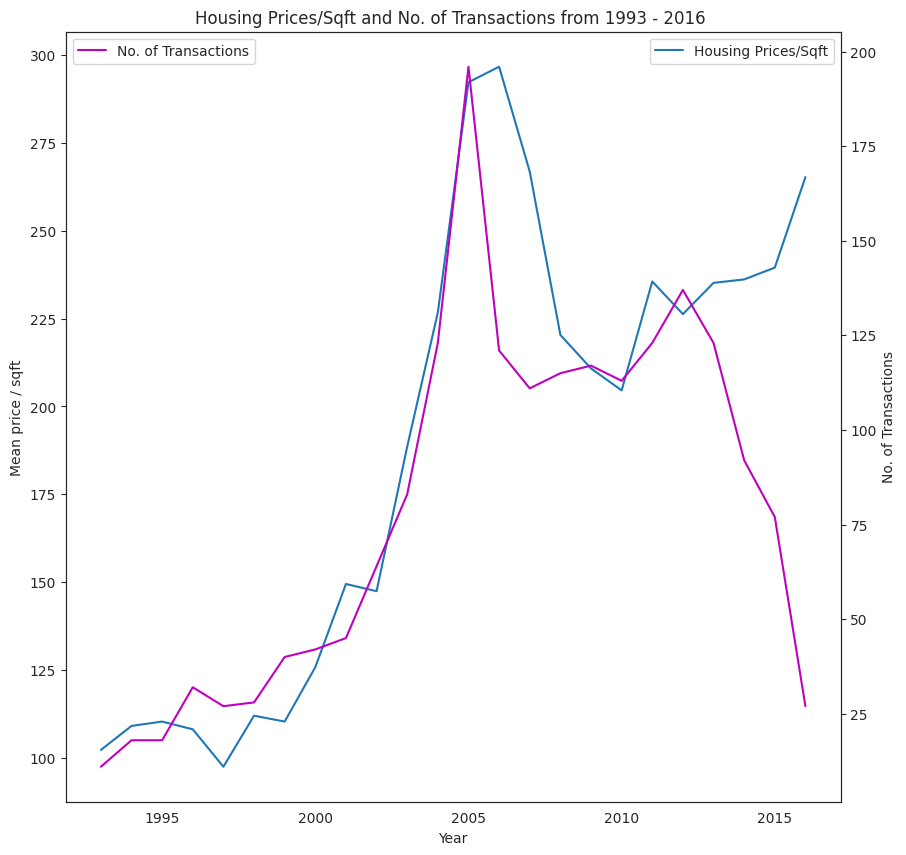

In [38]:
fig, ax = plt.subplots(figsize=(10,10))
ax2 = ax.twinx()
ax.plot(df.PriceSqft.groupby(by=df.tx_year).mean().index,df.PriceSqft.groupby(by=df.tx_year).mean().values)
ax2.plot(df.tx_year.groupby(by=df.tx_year).count().index,df.tx_year.groupby(by=df.tx_year).count().values,'m')
ax.set_title('Housing Prices/Sqft and No. of Transactions from 1993 - 2016 ')
ax.set_xlabel('Year')
ax.set_ylabel("Mean price / sqft")
ax2.set_ylabel("No. of Transactions")
ax.legend(['Housing Prices/Sqft'],loc=1)
ax2.legend(['No. of Transactions'],loc=2)

Text(0.5, 0, 'Year')

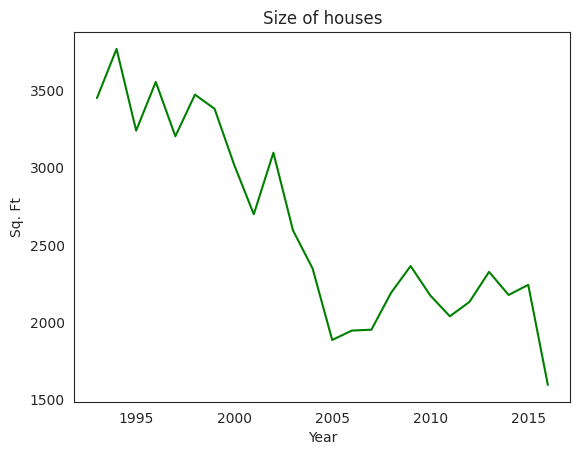

In [39]:
plt.plot(df.sqft.groupby(by=df.tx_year).mean().index,df.sqft.groupby(by=df.tx_year).mean().values,'g')
plt.title('Size of houses')
plt.ylabel('Sq. Ft')
plt.xlabel('Year')

In [40]:
byyear = df.select_dtypes(include=np.number).groupby(by=df.tx_year).mean() # Select only numerical features before calculating mean
x = byyear.index
n = []
v = []

for i in range(len(byyear.columns)): # Iterate through numerical columns only
    n.append(byyear.iloc[:, i].name)
    v.append(byyear.iloc[:, i].values)

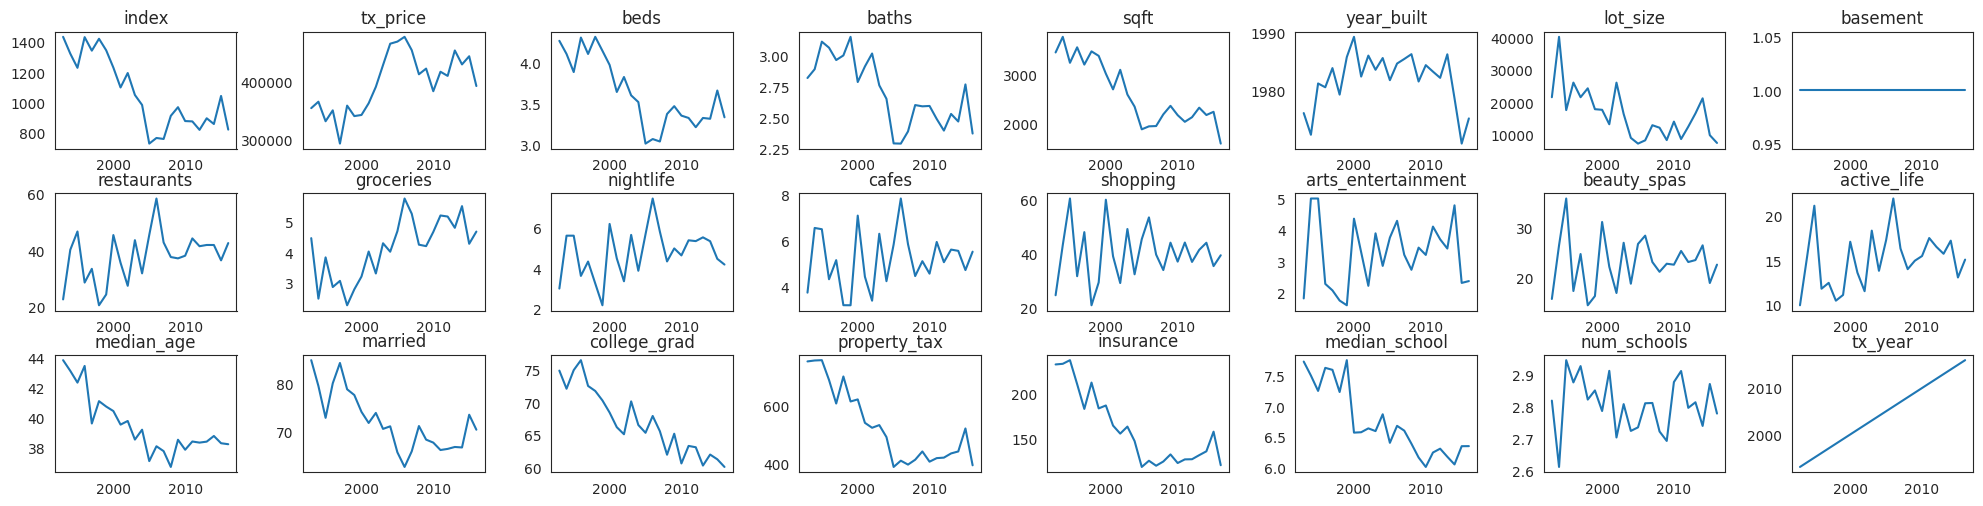

In [41]:
w = 8
h = 3
fig, ax = plt.subplots(h,w,figsize=(20,5))
plt.tight_layout()

for i in range(w):
    ax[0,i].plot(x,v[i])
    ax[1,i].plot(x,v[i+8])
    ax[2,i].plot(x,v[i+16])
    ax[0,i].set_title(n[i])
    ax[1,i].set_title(n[i+8])
    ax[2,i].set_title(n[i+16])

**3. Prepare Data for Modelling**

In [42]:
df2 = df.iloc[:,[0,4,6,22,23,1]]  #select all the numerical data with highest correlation
df2.head(5)

,index,sqft,lot_size,property_tax,insurance,tx_price
0,0,584,0,234.0,81.0,295850
1,1,612,0,169.0,51.0,216500
2,2,615,0,216.0,74.0,279900
3,3,618,33541,265.0,92.0,379900
4,4,634,0,88.0,30.0,340000


Text(0.5, 1.0, "['tx_price']")

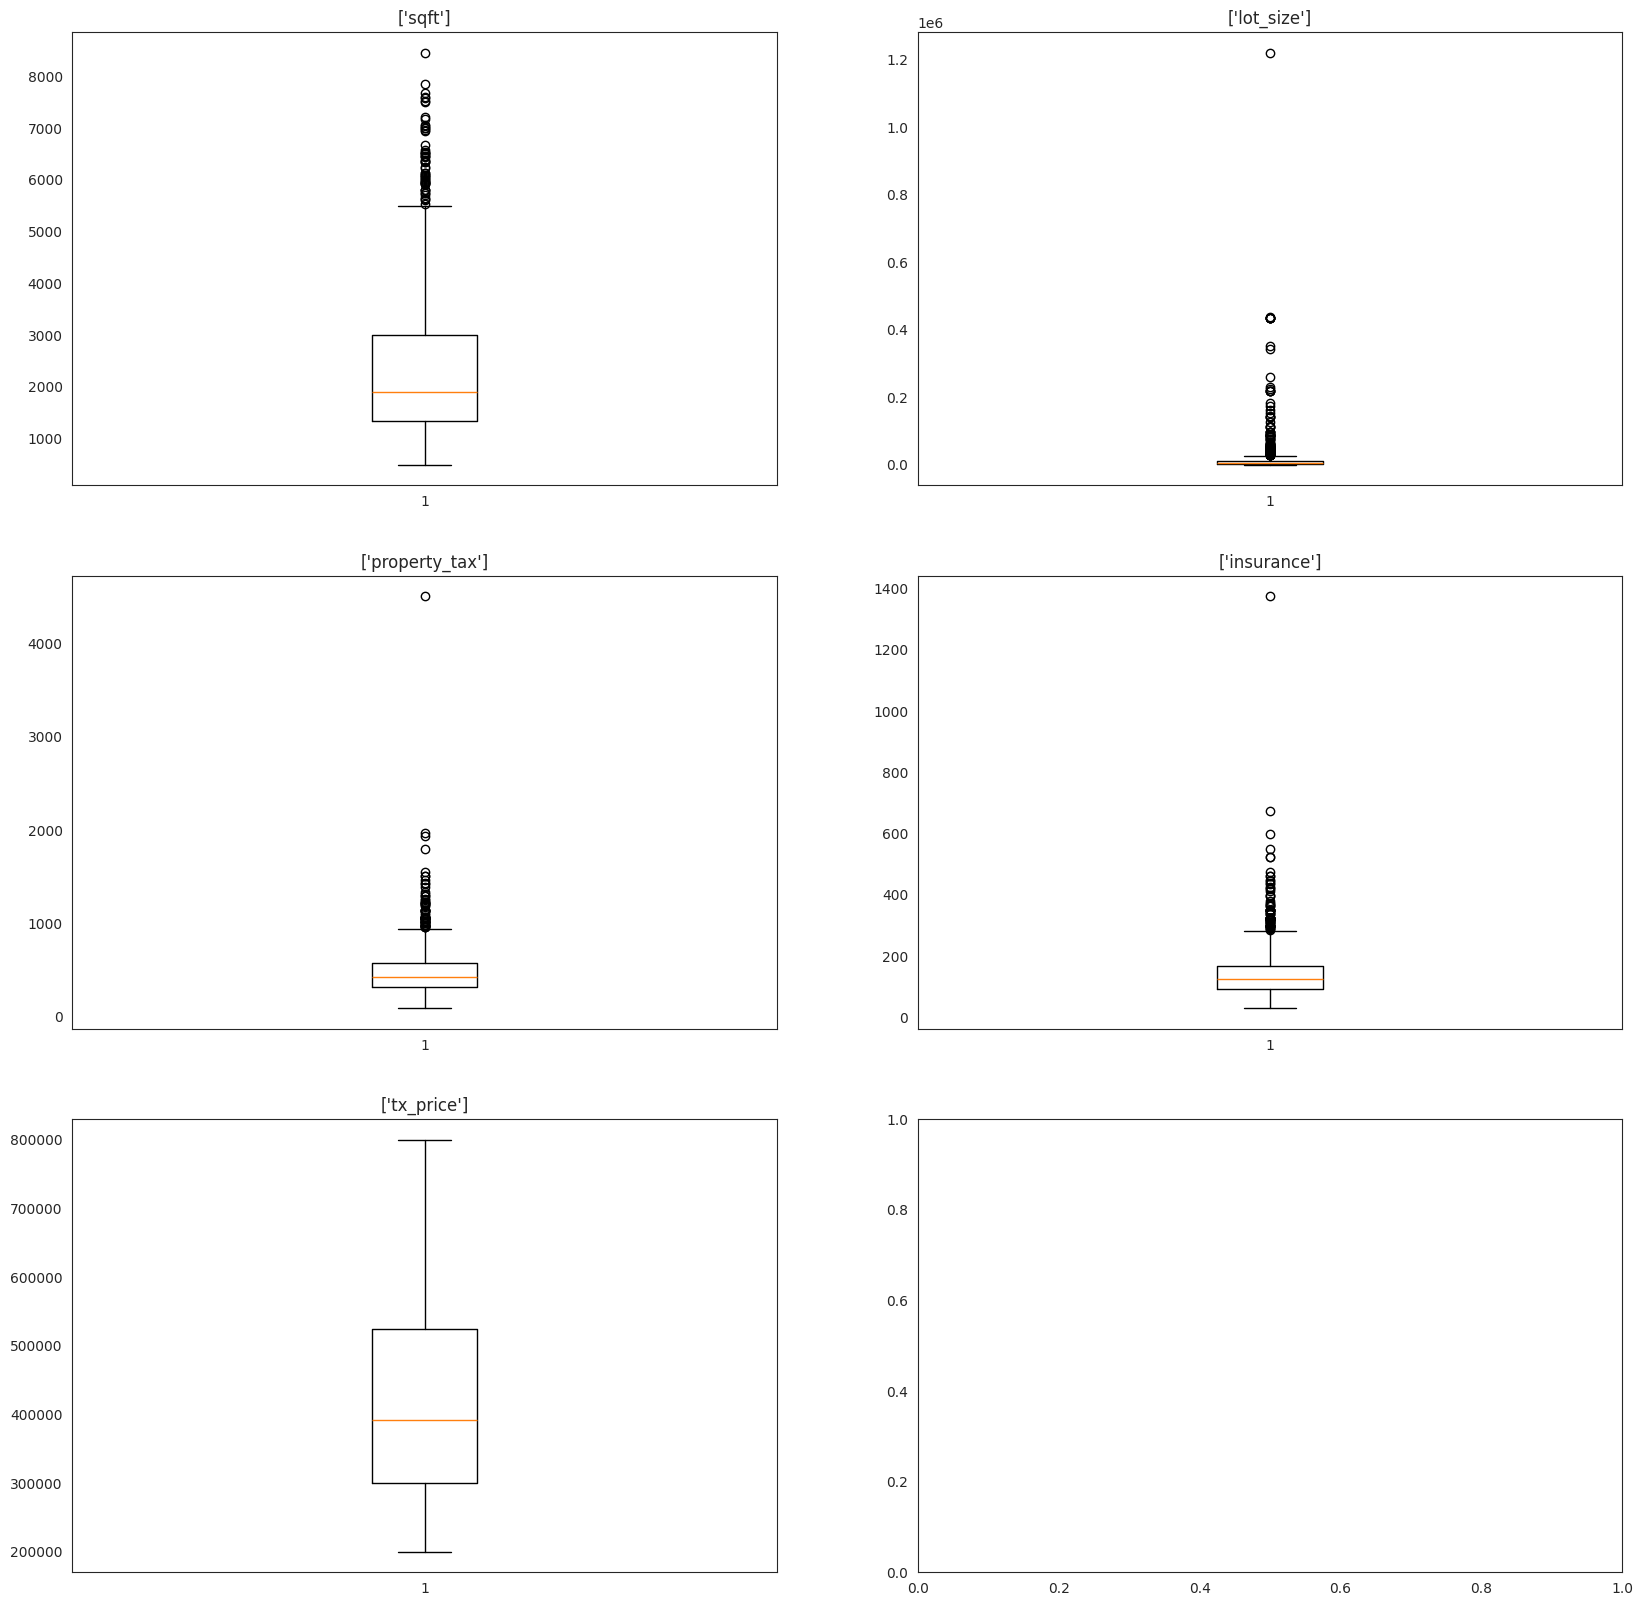

In [43]:
fig, ax = plt.subplots(3,2,figsize=(20,20))

ax[0,0].boxplot(df2.iloc[:,1])
ax[0,0].set_title(df2.iloc[:,1].to_frame().columns.values)

ax[0,1].boxplot(df2.iloc[:,2])
ax[0,1].set_title(df2.iloc[:,2].to_frame().columns.values)

ax[1,0].boxplot(df2.iloc[:,3])
ax[1,0].set_title(df2.iloc[:,3].to_frame().columns.values)

ax[1,1].boxplot(df2.iloc[:,4])
ax[1,1].set_title(df2.iloc[:,4].to_frame().columns.values)

ax[2,0].boxplot(df2.iloc[:,5])
ax[2,0].set_title(df2.iloc[:,5].to_frame().columns.values)

In [44]:
lot_sizeoutlier = df2[df2['lot_size']>600000]
lot_sizeoutlier

,index,sqft,lot_size,property_tax,insurance,tx_price
102,102,875,1220551,230.0,79.0,292999


In [45]:
propertytaxoutlier = df2[df2['property_tax']>3000]
propertytaxoutlier

,index,sqft,lot_size,property_tax,insurance,tx_price
1019,1019,1658,10500,4508.0,1374.0,430000


In [46]:
insuranceoutlier = df2[df2['insurance']>1200]
insuranceoutlier

,index,sqft,lot_size,property_tax,insurance,tx_price
1019,1019,1658,10500,4508.0,1374.0,430000


In [28]:
sqftoutlier = df2[df2['sqft']>8000]
sqftoutlier

,index,sqft,lot_size,property_tax,insurance,tx_price


In [47]:
#Remove out-lier
df2 = df2.drop(df2.index[[102,1019,1877]])

In [48]:
#Train-test-split
X3 = df2.drop(['tx_price'],axis=1)
y = df2.tx_price
X_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=0)

In [49]:
X_train.head(5)

,index,sqft,lot_size,property_tax,insurance
89,89,1489,0,258.0,89.0
678,678,2591,0,320.0,82.0
693,693,3040,3484,436.0,112.0
1370,1370,3061,15245,573.0,174.0
1372,1372,3082,9400,398.0,113.0


In [50]:
df4=df.loc[:,['index','tx_price','beds','baths','tx_year']]
X_train = pd.merge(X_train,df4,how='inner',on='index')
y_train = X_train.tx_price
X_train = X_train.drop(['tx_price','index'], axis=1)
X_test = pd.merge(X_test,df4,how='inner',on='index')
y_test = X_test.tx_price
X_test = X_test.drop(['tx_price','index'],axis=1)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1504, 7)
(1504,)
(376, 7)
(376,)


**4. Modelling and Evaluation**


**4.1 Random Forest Regressor**

MAE for Random Forest Regressor Model is:  44040.613428818644


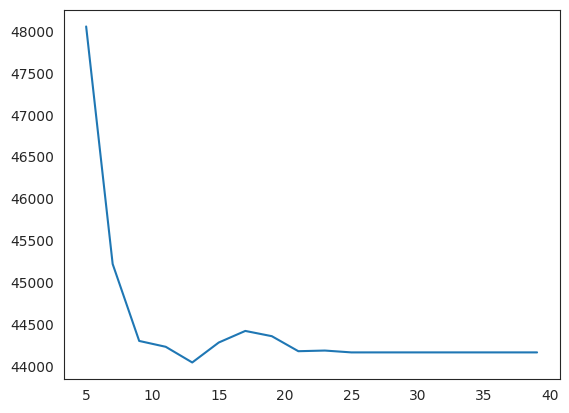

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

mae_rf =[]

for i in np.arange(5,40,2):
    model = RandomForestRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae_rf.append(mean_absolute_error(y_test, y_pred))

plt.plot(np.arange(5,40,2),mae_rf)
print("MAE for Random Forest Regressor Model is: ",min(mae_rf))

In [53]:
model_rf = RandomForestRegressor(max_depth=23, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

44161.07739361702


MAE for Gradient Boosting Regressor Model is:  32159.162897287606 
at max depth of 5 and learning rate of : 0.1


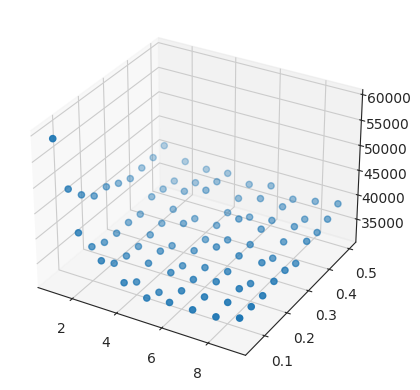

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
mae_gbr = []
locx = []
locy = []
for i in range(1,10):
    for j in np.arange(0.05,0.51,0.05):
        gbr_model = GradientBoostingRegressor(learning_rate=j, max_depth=i)
        scores = cross_val_score(gbr_model, X_train, y_train, cv=5, scoring="neg_median_absolute_error")
        cv_mae = abs(sum(scores)/len(scores))
        mae_gbr.append(cv_mae)
        locx.append(i)
        locy.append(j)

#model = GradientBoostingRegressor(learning_rate=j, max_depth=i)
#y_pred = model.predict(X_test)

print ("MAE for Gradient Boosting Regressor Model is: ",min(mae_gbr),"\nat max depth of",locx[(mae_gbr.index(min(mae_gbr)))],"and learning rate of :",locy[(mae_gbr.index(min(mae_gbr)))])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(locx, locy, mae_gbr)

In [55]:
from sklearn.metrics import mean_absolute_error

gbr_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5).fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
gbr_mae_scores = mean_absolute_error(y_test, y_pred)
print(gbr_mae_scores)

45198.99651332078


**Summary**

From section 4.2, the gradient boosting regressor model could predict the transaction price with an mean absolute error of $45k. After trying out training with different combination of features, the model predicts most accurately with only 7 features: sqft, lot size, property tax , insurance, beds, baths and tx year.

In [56]:
import pickle
pickle.dump(model, open('REIT_gbr_model.sav', 'wb'))